In [1]:
from konlpy.tag import Kkma
kkma = Kkma()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
file = open("abstract-kor.txt", mode='r', encoding='utf-8') # utf-8 or cp949 
doc = file.read()

doc

'전 세계적으로 냉동생지를 이용한 제품시장은 1950 년대부터 시작되었다. 현재, 냉동생지는 소비자들에게 신선한 제품을 제공 할 수 있고, 노동력이 절감되며, 재고 관리가 용이하고, 계획생산이 가능하다는 장점을 가지고 있어(Autio & Sinda, 1992; Park et al., 2006) 그 수요가 증가하고 있으며 이에 따라 그 시장 규모도 지속적으로 커지고 있다(Giannou & Tzia, 2007; Lee et al., 2001). 최근 국내에서도 제빵 산업에서 냉동생지를 이용한 제품 생산 기술이 큰 기술발전을 이루고 있으며, 고급 베이커리 제품으로 새로운 영역을 확장하고 있는 등 많은 각광을 받고 있다. 냉동생지는 밀가루 반죽을 동결 킨 후 -18--20oC 에서 냉동 저장하여 효모 및 효소의 활동을 억제시키고 글루텐 결합구조의 손상을 최소화하여 밀가루 반죽의 제빵 적성을 장기간 유지 보존하는데 그 목적이 있다(Hui, 2006; Karel Kulp et al., 1998). 하지만 냉동생지는 기존의 제빵공정 이외에 냉해동 공정이 추가됨으로써 보다 복잡한 제어 공정이 필요하며, 최종 제품을 제조 시 발효시간이 오래 걸리고, 빵의 부피가 감소하며, 조직감이 떨어지는 등의 품질 면에서도 여러 가지 문제점이 보고되고 있다(Kenny et al., 1999). 이는 냉동 과정 시 생성되는 얼음결정에 의한 세포막의 약화에 따른 효모의 손상과 이로 인한 활성 저하, 냉동저장 중 반죽 내부의 글루텐 결합조직의 분해 등 다양한 요인으로부터 발생될 수 있다(Hui, 2006). 이러한 냉동생지의 문제점을 개선하기 위한 다양한 연구가 수행되어 왔는데 냉동 반죽 제조 시 검류(Lee et al., 2001; Sharadanant & Khan, 2003a), 유화제(Park et al., 2006; Lee et al., 2004a), 그리고 산화제(Lee et al., 2004b) 등을 첨가하여 제빵적성에 미치는 영향을 평가하였으며, 효소적 처리를 통한 제빵적성을 증진시

In [5]:
# 문장 추출
ex_sent = kkma.sentences(doc)

print (ex_sent)

['전 세계적으로 냉동 생지를 이용한 제품시장은 1950 년대부터 시작되었다.', '현재, 냉동 생지는 소비자들에게 신선한 제품을 제공 할 수 있고, 노동력이 절감되며, 재고 관리가 용이하고, 계획 생산이 가능하다는 장점을 가지고 있어 (Autio & Sinda, 1992; Park et al., 2006) 그 수요가 증가하고 있으며 이에 따라 그 시장 규모도 지속적으로 커지고 있다 (Giannou & Tzia, 2007; Lee et al., 2001). 최근 국내에서도 제빵 산업에서 냉동 생지를 이용한 제품 생산 기술이 큰 기술발전을 이루고 있으며, 고급 베이커리 제품으로 새로운 영역을 확장하고 있는 등 많은 각광을 받고 있다.', '냉동 생지는 밀가루 반죽을 동결 킨 후 -18--20oC 에서 냉동 저장하여 효모 및 효소의 활동을 억제시키고 글루텐 결합구조의 손상을 최소화하여 밀가루 반죽의 제빵 적성을 장기간 유지 보존하는데 그 목적이 있다 (Hui, 2006; Karel Kulp et al., 1998). 하지만 냉동 생지는 기존의 제빵 공정 이외에 냉해 동 공정이 추가됨으로써 보다 복잡한 제어 공정이 필요하며, 최종 제품을 제조 시 발효시간이 오래 걸리고, 빵의 부피가 감소하며, 조직감이 떨어지는 등의 품질 면에서도 여러 가지 문제점이 보고 되고 있다 (Kenny et al., 1999). 이는 냉동 과정 시 생성되는 얼음결정에 의한 세포막의 약화에 따른 효모의 손상과 이로 인한 활성 저하, 냉동 저장 중 반죽 내부의 글루텐 결합조직의 분해 등 다양한 요인으로부터 발생될 수 있다 (Hui, 2006). 이러한 냉동 생지의 문제점을 개선하기 위한 다양한 연구가 수행되어 왔는데 냉동 반죽 제조 시 검류 (Lee et al., 2001; Sharadanant & Khan, 2003a), 유화제 (Park et al., 2006; Lee et al., 2004a), 그리고 산화제 (Lee et al., 2004b) 등을 첨가 하여 제빵 적성에 미치는 영향을 

In [10]:
# 명사 추출 및 정규식
from re import match
nouns = []
for sent in ex_sent : 
    for noun in kkma.nouns(sent) :
        if len(str(noun)) >= 2 and not(match('^[0-9]', noun)): # 단어 전처리 : 2음절 이상, 숫자 제외 
            nouns.append(noun)
            
nouns

['세계적',
 '냉동',
 '생지',
 '이용',
 '제품',
 '제품시장',
 '시장',
 '년대',
 '시작',
 '현재',
 '냉동',
 '생지',
 '소비자',
 '제품',
 '제공',
 '노동력',
 '절감',
 '재고',
 '관리',
 '계획',
 '생산',
 '가능',
 '장점',
 '수요',
 '증가',
 '시장',
 '규모',
 '지속적',
 '최근',
 '국내',
 '산업',
 '이용',
 '기술',
 '기술발전',
 '발전',
 '고급',
 '베이커리',
 '영역',
 '확장',
 '각광',
 '냉동',
 '생지',
 '밀가루',
 '반죽',
 '동결',
 '-18',
 '-20',
 '저장',
 '효모',
 '효소',
 '활동',
 '억제',
 '글루텐',
 '결합',
 '결합구조',
 '구조',
 '손상',
 '최소화',
 '적성',
 '장기간',
 '유지',
 '보존',
 '목적',
 '기존',
 '공정',
 '이외',
 '냉해',
 '추가',
 '제어',
 '필요',
 '최종',
 '제품',
 '제조',
 '발효',
 '발효시간',
 '시간',
 '부피',
 '감소',
 '조직감',
 '품질',
 '가지',
 '문제점',
 '과정',
 '생성',
 '얼음',
 '얼음결정',
 '결정',
 '세포막',
 '약화',
 '이로',
 '활성',
 '저하',
 '내부',
 '결합조직',
 '조직',
 '분해',
 '다양',
 '요인',
 '발생',
 '개선',
 '연구가',
 '수행',
 '검류',
 '유화제',
 '산화제',
 '첨가',
 '영향',
 '평가',
 '처리',
 '증진',
 '연구',
 '연구결과',
 '결과',
 '조건',
 '특성',
 '비교',
 '기본',
 '적인',
 '물성',
 '학적',
 '분석',
 '최종제품',
 '연관',
 '제한',
 '실정',
 '냉장',
 '생지',
 '최종',
 '제품',
 '물리적',
 '특성',
 '연구',
 '냉동',
 '공정',
 '제어',
 '개발',
 '필요',
 '기초',

In [11]:
# 불용어 제거

stopwords = ['년대', '최근', '이외']

words = [word for word in nouns if word not in stopwords]

word_count = {} # 빈 set

for noun in words :
    word_count[noun] = word_count.get(noun, 0) + 1

print (len(word_count))
    
word_count

125


{'세계적': 1,
 '냉동': 5,
 '생지': 5,
 '이용': 2,
 '제품': 5,
 '제품시장': 1,
 '시장': 2,
 '시작': 1,
 '현재': 1,
 '소비자': 1,
 '제공': 2,
 '노동력': 1,
 '절감': 1,
 '재고': 1,
 '관리': 1,
 '계획': 1,
 '생산': 1,
 '가능': 1,
 '장점': 1,
 '수요': 1,
 '증가': 1,
 '규모': 1,
 '지속적': 1,
 '국내': 1,
 '산업': 1,
 '기술': 1,
 '기술발전': 1,
 '발전': 1,
 '고급': 1,
 '베이커리': 1,
 '영역': 1,
 '확장': 1,
 '각광': 1,
 '밀가루': 2,
 '반죽': 1,
 '동결': 1,
 '-18': 1,
 '-20': 1,
 '저장': 2,
 '효모': 1,
 '효소': 1,
 '활동': 1,
 '억제': 1,
 '글루텐': 1,
 '결합': 1,
 '결합구조': 1,
 '구조': 1,
 '손상': 1,
 '최소화': 1,
 '적성': 1,
 '장기간': 1,
 '유지': 1,
 '보존': 1,
 '목적': 1,
 '기존': 1,
 '공정': 2,
 '냉해': 1,
 '추가': 1,
 '제어': 2,
 '필요': 2,
 '최종': 3,
 '제조': 2,
 '발효': 1,
 '발효시간': 1,
 '시간': 1,
 '부피': 2,
 '감소': 1,
 '조직감': 1,
 '품질': 3,
 '가지': 1,
 '문제점': 1,
 '과정': 1,
 '생성': 1,
 '얼음': 1,
 '얼음결정': 1,
 '결정': 1,
 '세포막': 1,
 '약화': 1,
 '이로': 1,
 '활성': 1,
 '저하': 1,
 '내부': 1,
 '결합조직': 1,
 '조직': 1,
 '분해': 1,
 '다양': 1,
 '요인': 1,
 '발생': 1,
 '개선': 1,
 '연구가': 1,
 '수행': 1,
 '검류': 1,
 '유화제': 1,
 '산화제': 1,
 '첨가': 1,
 '영향': 1,
 '평가': 2,


In [13]:
# top_n
from collections import Counter

counter = Counter(word_count)
print (counter)

#top50 = counter.most_common(50)
top20 = counter.most_common(20)
print (top20)

Counter({'냉동': 5, '생지': 5, '제품': 5, '최종': 3, '품질': 3, '연구': 3, '특성': 3, '이용': 2, '시장': 2, '제공': 2, '밀가루': 2, '저장': 2, '공정': 2, '제어': 2, '필요': 2, '제조': 2, '부피': 2, '평가': 2, '물성': 2, '분석': 2, '세계적': 1, '제품시장': 1, '시작': 1, '현재': 1, '소비자': 1, '노동력': 1, '절감': 1, '재고': 1, '관리': 1, '계획': 1, '생산': 1, '가능': 1, '장점': 1, '수요': 1, '증가': 1, '규모': 1, '지속적': 1, '국내': 1, '산업': 1, '기술': 1, '기술발전': 1, '발전': 1, '고급': 1, '베이커리': 1, '영역': 1, '확장': 1, '각광': 1, '반죽': 1, '동결': 1, '-18': 1, '-20': 1, '효모': 1, '효소': 1, '활동': 1, '억제': 1, '글루텐': 1, '결합': 1, '결합구조': 1, '구조': 1, '손상': 1, '최소화': 1, '적성': 1, '장기간': 1, '유지': 1, '보존': 1, '목적': 1, '기존': 1, '냉해': 1, '추가': 1, '발효': 1, '발효시간': 1, '시간': 1, '감소': 1, '조직감': 1, '가지': 1, '문제점': 1, '과정': 1, '생성': 1, '얼음': 1, '얼음결정': 1, '결정': 1, '세포막': 1, '약화': 1, '이로': 1, '활성': 1, '저하': 1, '내부': 1, '결합조직': 1, '조직': 1, '분해': 1, '다양': 1, '요인': 1, '발생': 1, '개선': 1, '연구가': 1, '수행': 1, '검류': 1, '유화제': 1, '산화제': 1, '첨가': 1, '영향': 1, '처리': 1, '증진': 1, '연구결과': 1, '결과': 1, '조건': 1, '비교':

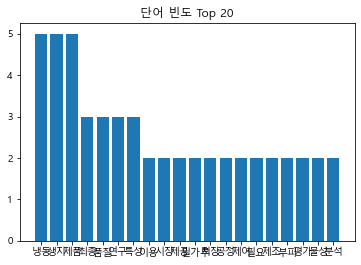

In [16]:
plt.rc('font', family='Malgun Gothic')

x = len(top20)
words1 = []
for i in range(x):
    words1.append(top20[i][0])

values1 = []
for i in range(x):
    values1.append(top20[i][1])
 # 
#plt.bar(np.arange(x), values1)
plt.figure()
plt.bar(words1, values1)
plt.title('단어 빈도 Top 20')

plt.show()

(-0.5, 799.5, 799.5, -0.5)

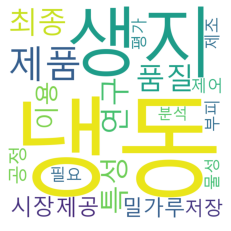

In [18]:
wc = WordCloud(font_path='malgun', width=400, height=400, background_color = 'white', scale=2.0, max_font_size=250) # white
gen = wc.generate_from_frequencies(dict(top20))

plt.figure()
plt.imshow(gen)
plt.axis('off')


In [19]:
#화일로 저장
wc.to_file('word_cloud.png')

(-0.5, 845.5, 749.5, -0.5)

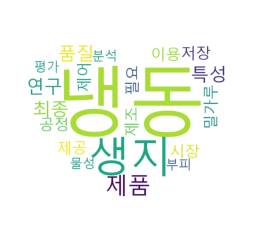

In [21]:
# 원하는 모양으로
from PIL import Image
import numpy as np

mask = np.array(Image.open('love.png'))
#wc = WordCloud(font_path=font_path, background_color="white", mask=mask)

wc = WordCloud(font_path='malgun', width=400, height=400, background_color = 'white', scale=2.0, max_font_size=250, mask=mask)
gen = wc.generate_from_frequencies(dict(top20))

plt.figure()
plt.imshow(gen)
plt.axis('off')